# MILESTONE 1

IRFAN FAHMUDDIN M FTDS 011

**Objectives**
Churn Prediction with Artificial neural network

In [172]:
# import library

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

## DATA LOADING

In [2]:
df = pd.read_csv('data_m1p2.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# ubah tipe data
#pd.to_numeric(df['TotalCharges'])

In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


## EDA

1. Kita cek berapa pelanggan yang memanfaatkan fasilitas yang ada

<AxesSubplot:xlabel='OnlineSecurity'>

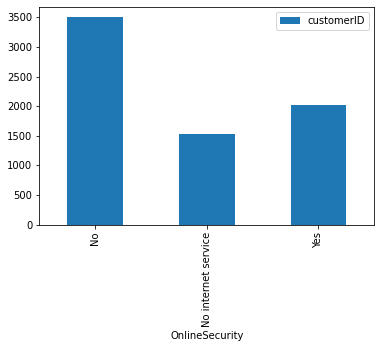

In [7]:
df.groupby('OnlineSecurity').count()[['customerID']].plot(kind= 'bar')

<AxesSubplot:xlabel='OnlineBackup'>

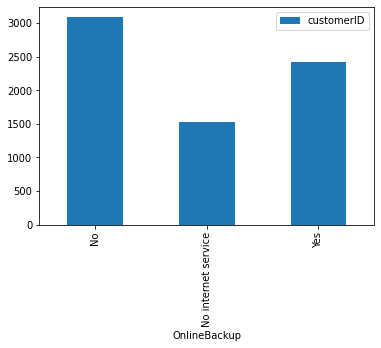

In [8]:
df.groupby('OnlineBackup').count()[['customerID']].plot(kind= 'bar')

<AxesSubplot:xlabel='DeviceProtection'>

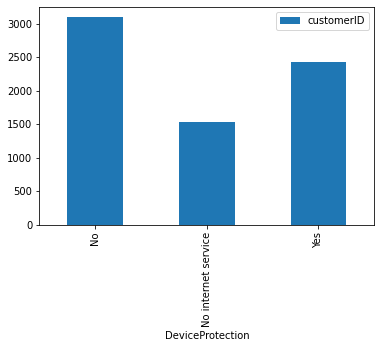

In [9]:
df.groupby('DeviceProtection').count()[['customerID']].plot(kind= 'bar')

<AxesSubplot:xlabel='TechSupport'>

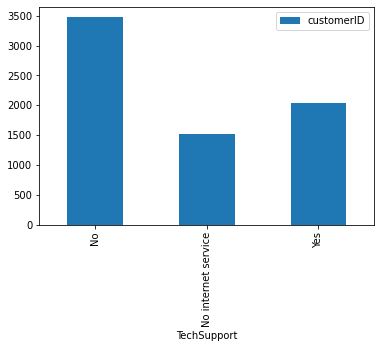

In [10]:
df.groupby('TechSupport').count()[['customerID']].plot(kind= 'bar')

<AxesSubplot:xlabel='StreamingTV'>

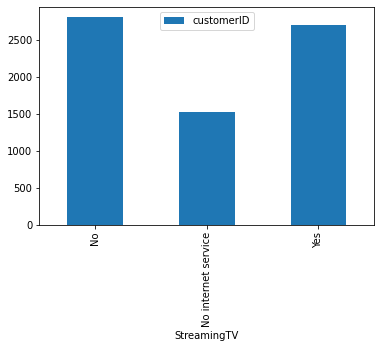

In [11]:
df.groupby('StreamingTV').count()[['customerID']].plot(kind= 'bar')

<AxesSubplot:xlabel='StreamingMovies'>

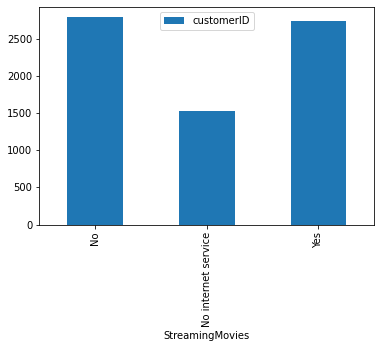

In [12]:
df.groupby('StreamingMovies').count()[['customerID']].plot(kind= 'bar')

<AxesSubplot:xlabel='PhoneService'>

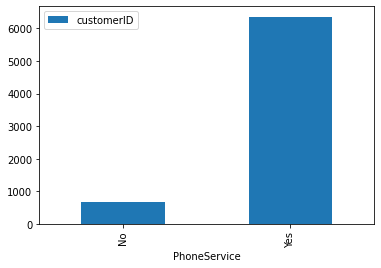

In [13]:
df.groupby('PhoneService').count()[['customerID']].plot(kind= 'bar')

Berdasarkan beberapa grafik diatas, masih banyak pelanggan yang tidak memanfaatkan layanan yang ada. Kemungkinan banyak pelanggan kebanyakan hanya memanfaatkan layanan telpon saaja sehingga mereka tidak butuh layanan lainnya seperti streaming, protection, dan lainnya. Hal ini bisa kita lihat bahwa pengguna layanan telpon sangat banyak dan mendominasi jumlahnya sedangkan pelanggan yang tidak memanfaatkan layanan telfon ini kemungkinan hanya membutuhkan layanan diluar telfon seperti streaming dan internet

2. Bagiamana pengaruh gender terhadap pelanggan yang menjadi partner?

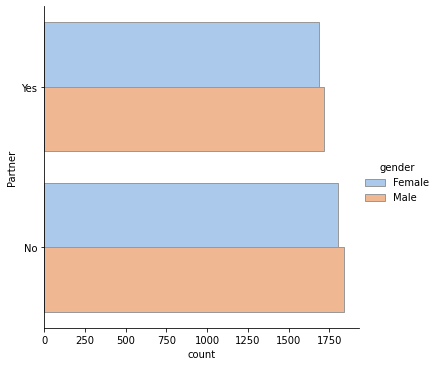

In [14]:
sns.catplot(y="Partner", hue="gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

Dari grafik diatas, diketahui bahwa gender untuk yang menjadi partner maupun tidak hampir sama namun pelanggan wanita lebih tinggi nilainya walaupun tidak jauh berbeda nilainya sehingga gender ini tidak bisa dikatakan berpengaruh terhadap pelanggan partner.

Kemudian untuk dependents dibawah kita bisa lihat nilainya hampir sama antara wanita dan pria sehingga gender ini juga tidak bisa dikatakan menjadi pengaruh terhadap dependents

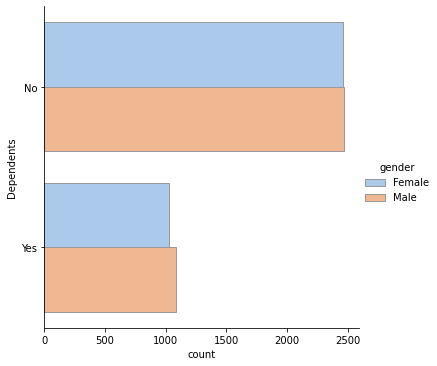

In [15]:
sns.catplot(y="Dependents", hue="gender", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

3. Berapa jumlah pelanggan setiap kategori layanaan internet yang disediakan

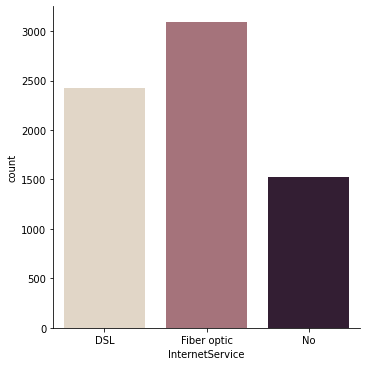

In [16]:
sns.catplot(x="InternetService", kind="count", palette="ch:.25", data=df)

Kita dapat melihat bahwa pengguna fiber optic ini jauh lebih tinggi daripada DSL. Beberapa pelanggan juga ada yang tidak mengaktifkan layanan internet

4. Bagimana jumlah tagihan bulanan terhadap ketetapan pelanggan?

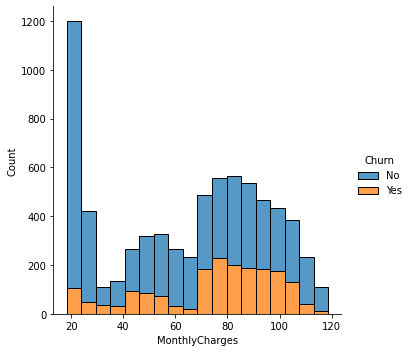

In [17]:
sns.displot(df, x="MonthlyCharges", hue="Churn", multiple="stack")

Berdasarkan hasil diatas, kita dapat lihat bahwa jumlah pelanggan yang masih tetap jumlahnya lebih banyak daripada yang pindah. Kita tau juga bahwa besarnya tagihan bulanan tidak terlalu ada hubungannya dengan pelanggan tetap karena tidak membentuk garis diagonal pada plotnya.

5. Bagaimana pengaruh metode pembayaran terhadap tagihan total?

<AxesSubplot:xlabel='PaymentMethod'>

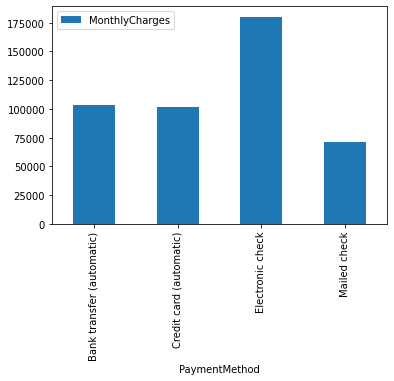

In [18]:
df.groupby('PaymentMethod').sum()[['MonthlyCharges']].plot(kind='bar')

Berdasrkan grafik diatas, kita dapat mengetahui bahwa pembayaran dengan electroniccheck memiliki nominal yang jauh lebih besar daripada metode pembayaran lainnya

6. Bagaimana korelasi antar kolom yg numerik ?

<AxesSubplot:>

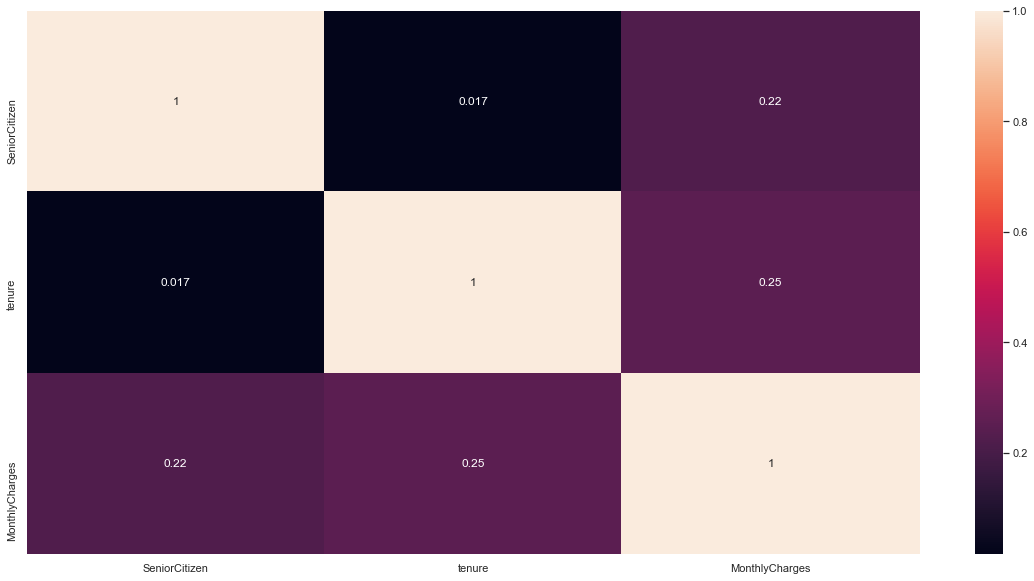

In [19]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True)

Dapat dilihat bahwa terdapat 3 kolom diatas. jika nilai mendekati 1 maka korelasi antara keduanya akan semakin besar dan begitu sebaliknya. Dari data diatas, kita lihat bahwa korelasi terbesar ialah antara tagihan bulanan dengan tenure pelanggan. Dari gambar diatas pun kita dapat mengetahui bahwa senior citizen tidak terlalu berpengaruh dengan tenure pelanggan dan sedikit sekali berpengaruh yaitu seabesar 0.22 terhadap tagihan bulanan pelanggan telekomunikasi

7. Bagaimana jumlah tenor customer terhadap pelanggan yang tetap dan tidak

<AxesSubplot:xlabel='tenure', ylabel='Count'>

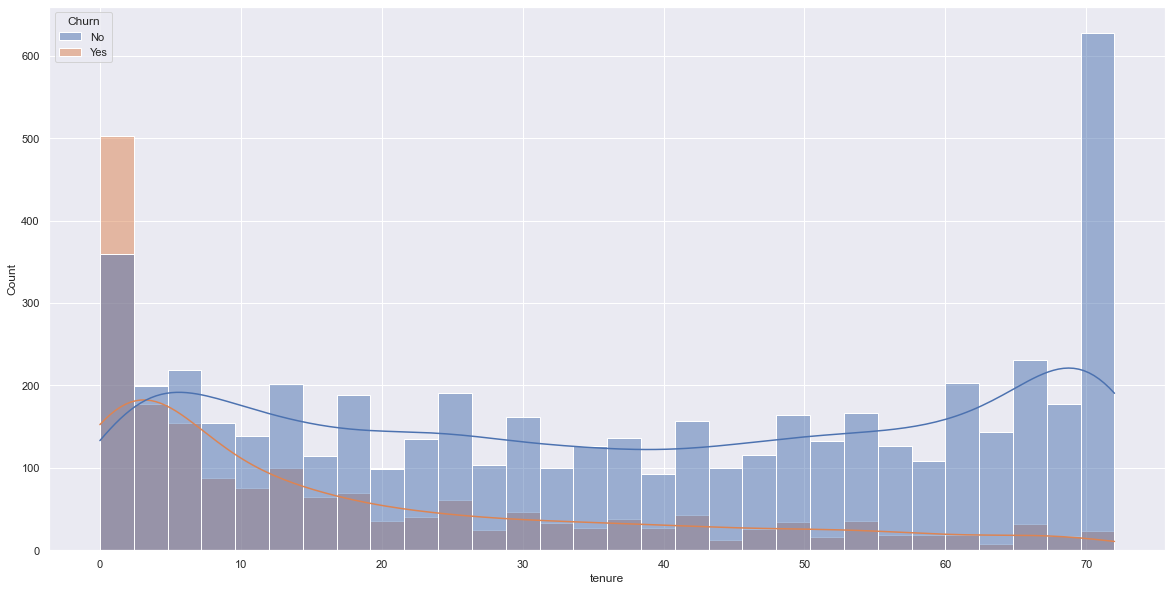

In [198]:
sns.histplot(data=df, x='tenure', bins=30, kde=True, hue='Churn', color='Blues')

Berdasarkan grafik diatas, kita dapat melihat bahwa kehilangan customer paling banyak pada tenor awal sedangkan customer tetap paling banyak berada di tenor sekitar 70. Artinya, cukup banyak customer yang mungkin mencoba layanan ini dan ketika tidak menarik, maka customer akan pergi. Sebaliknya, pelanggan yang tenornya memasuki ke 70 sangat banyak karena merasa cocok atau nyaman dengan layanan yang disediakan sehingga menjadi customer tetap. Namun, perlu diperhatikan pada customer tetap ini belum mengalami peningkatan yagn signifikan tidak seperti customer yang hilan mengalami penuran tiap bulannya.

## DATA PREPROCESSING

In [20]:
# copy data

datacopy = df.copy()

In [21]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Totalcharges merupakan objecet padahal isinya angka, kita akan ubah kedalam numerik

In [22]:
# ubah kolom churn ke biner
datacopy.replace({'Churn': {'Yes': 1, 'No': 0}}, inplace= True)

In [23]:
datacopy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
# ubah tipe data ke numerik
#datacopy['TotalCharges'] = datacopy['TotalCharges'].astype(float)

Dengan fungsi diatas terdapat error " " yang menandakan datanya kosong sehingga akan kita handle

In [25]:
datacopy['TotalCharges'] = datacopy['TotalCharges'].replace(" ", np.nan)

In [26]:
datacopy['TotalCharges'] = datacopy['TotalCharges'].astype(float)

In [27]:
# cek info untuk lihat missing values
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# terdapat data hilang dan karena jumlahnya dikit maka akan didrop

datacopy.dropna(inplace= True)

In [29]:
# cek kembali missing values

datacopy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Ukuran data telah berkurang karena missing values didrop

In [31]:
# ubah data target ke kategorikal

datacopy['Churn'] = datacopy['Churn'].astype('category')
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

### Handling outlier

In [32]:
# drop kolom yang tidak akan digunakan
datacopy.drop(['customerID','gender','SeniorCitizen'],axis=1, inplace= True)

In [33]:
# cek skewness data

datacopy.skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

Data yang skew adalah totalcharges namun masih dianggap wajar untuk outliernya sehingga tidak akan dilakukan fungsi trimming ataupun crapping

### Split data

In [34]:
# split between X dan y

X = datacopy.drop(['Churn'], axis = 1)
y= datacopy['Churn']

In [35]:
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, shuffle=True, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, shuffle=True, test_size=0.2)

In [36]:
print('train size:', X_train.shape)
print('val size:', X_val.shape)
print('test size:', X_test.shape)


train size: (4500, 17)
val size: (1407, 17)
test size: (1125, 17)


### Feature Scaling

Karena kolom numerik datanya terdistribusi normal, akan digunakan standardscaller

In [37]:
# mendefinisikan mana kolom yang berisi number maupun categorical
num_columns = X_train_full.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_full.select_dtypes(include=['object']).columns.tolist()

print ('Kolom yang merupakan number adalah: ',num_columns)

print ('\n Kolom yang merupakan categorical adalah: ',cat_columns)

Kolom yang merupakan number adalah:  ['tenure', 'MonthlyCharges', 'TotalCharges']

 Kolom yang merupakan categorical adalah:  ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [38]:
# buat variabel baru untuk kategorikal dan numerik

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

In [39]:
# feature scaling
scaler = StandardScaler()

# lakukan fit scaling untuk tiap data
scaler.fit(X_train_num)

# lakukan transform scaling untuk tiap data 
X_test_scaled = scaler.transform(X_test_num)
X_train_scaled = scaler.transform(X_train_num)
X_val_scaled = scaler.transform(X_val_num)

### Feature Encoding

Karena data kategorikal bukan merupakan data ordinal, maka akan digunakan onehotencoder

In [40]:
# feature encoding

encoder = OneHotEncoder()

# lakukan fit encoding untuk tiap data
encoder.fit(X_train_cat)

# lakukan transform encoding untuk tiap data
X_test_encoded = encoder.transform(X_test_cat).toarray()
X_train_encoded = encoder.transform(X_train_cat).toarray()
X_val_encoded = encoder.transform(X_val_cat).toarray()

In [41]:
# concate columns semuanya yg cat dan num

X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis =1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis =1)
X_val_final = np.concatenate([X_val_scaled, X_val_encoded], axis =1)

In [42]:
X_train_final.shape[1:]

(42,)

In [43]:
len(X_train_final.shape[1:])

1

## MODEL DEFINITION

Untuk pendefinisian ini, digunakan parameter seperti initializer, activation, dll dengan random berdasarkan hasil pembelajaran selama ini. Kemudian akan digunakan sequential API pada pemodelan. Untuk functional API akan dilaksanakan setelah proses model improvement

In [148]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,input_shape=X_train_final.shape[1:],kernel_initializer= tf.keras.initializers.GlorotUniform(seed =40), activation = 'tanh'))


model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))


model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))


model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))


model.add(tf.keras.layers.Dense(1, activation='relu'))

## MODEL TRAINING

In [151]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.15,clipvalue=1.0),
              metrics='accuracy')

In [150]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                2752      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 activation_23 (Activation)  (None, 32)                0         
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 activation_24 (Activation)  (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 8)                 136       
                                                                 
 activation_25 (Activation)  (None, 8)                

In [152]:
history = model.fit(X_train_final, y_train, epochs=70, batch_size=64,
                    validation_data=(X_val_final,y_val),verbose=1)

Epoch 1/70
71/71 [==============================] - 1s 6ms/step - loss: 0.6538 - accuracy: 0.7487 - val_loss: 0.8560 - val_accuracy: 0.7122
Epoch 2/70
71/71 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.7420 - val_loss: 4.2670 - val_accuracy: 0.7086
Epoch 3/70
71/71 [==============================] - 0s 4ms/step - loss: 0.8511 - accuracy: 0.7420 - val_loss: 0.4549 - val_accuracy: 0.7875
Epoch 4/70
71/71 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.7476 - val_loss: 7.7721 - val_accuracy: 0.4392
Epoch 5/70
71/71 [==============================] - 0s 3ms/step - loss: 4.1998 - accuracy: 0.7131 - val_loss: 4.4948 - val_accuracy: 0.7086
Epoch 6/70
71/71 [==============================] - 0s 3ms/step - loss: 3.9968 - accuracy: 0.7409 - val_loss: 4.4948 - val_accuracy: 0.7086
Epoch 7/70
71/71 [==============================] - 0s 4ms/step - loss: 3.9968 - accuracy: 0.7409 - val_loss: 4.4948 - val_accuracy: 0.7086
Epoch 8/70
71/71 [==

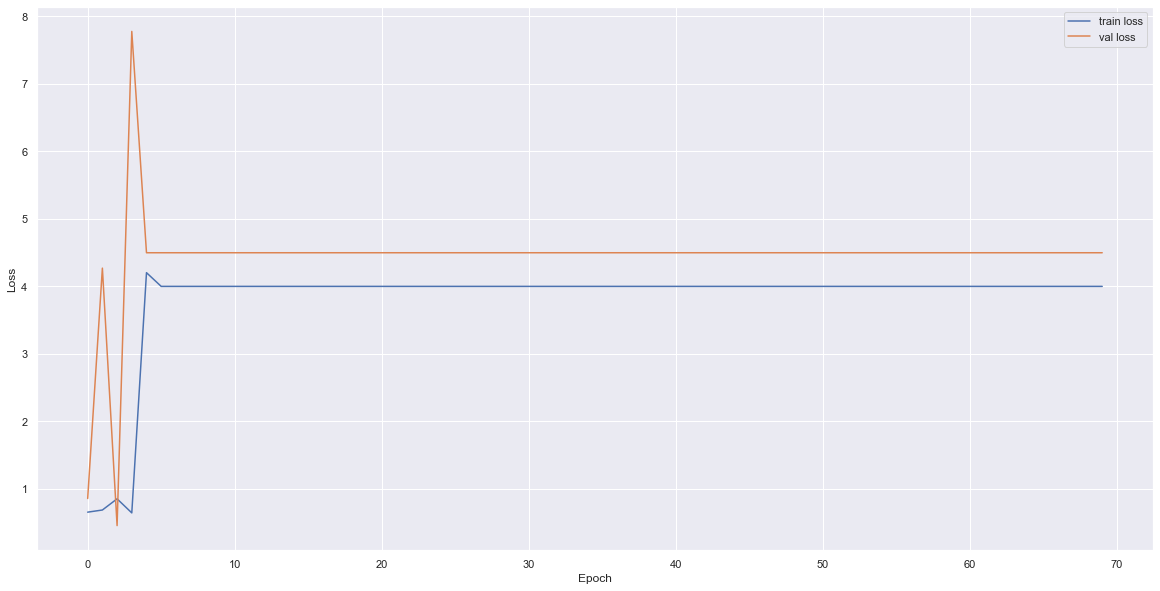

In [153]:
# plot hasil ke grafik
fig, ax = plt.subplots()
ax.plot(history.history['loss'],label='train loss')
ax.plot(history.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

### MODEL IMPROVEMENT

Karena hasil diatas sangat kurang baik, maka akan dilakukan trial & error pada bagian ini untuk mendapatkan hasil yang baik

In [154]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=X_train_final.shape[1:], kernel_initializer='uniform', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(64, kernel_initializer='uniform'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(32, kernel_initializer='uniform'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(16, kernel_initializer='uniform'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))

model.add(tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [155]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.15,clipvalue= 1.0), 
              metrics=['acc'])

In [156]:
history = model.fit(X_train_final, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val_final,y_val),verbose=1)

Epoch 1/100
71/71 [==============================] - 2s 7ms/step - loss: 0.6461 - acc: 0.7333 - val_loss: 0.5338 - val_acc: 0.7086
Epoch 2/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4785 - acc: 0.7413 - val_loss: 0.4818 - val_acc: 0.7079
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4736 - acc: 0.7400 - val_loss: 0.4691 - val_acc: 0.7086
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4648 - acc: 0.7531 - val_loss: 0.4466 - val_acc: 0.7839
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4673 - acc: 0.7718 - val_loss: 0.4434 - val_acc: 0.7960
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4663 - acc: 0.7611 - val_loss: 0.4440 - val_acc: 0.7768
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.4514 - acc: 0.7884 - val_loss: 0.4619 - val_acc: 0.7889
Epoch 8/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4610 - a

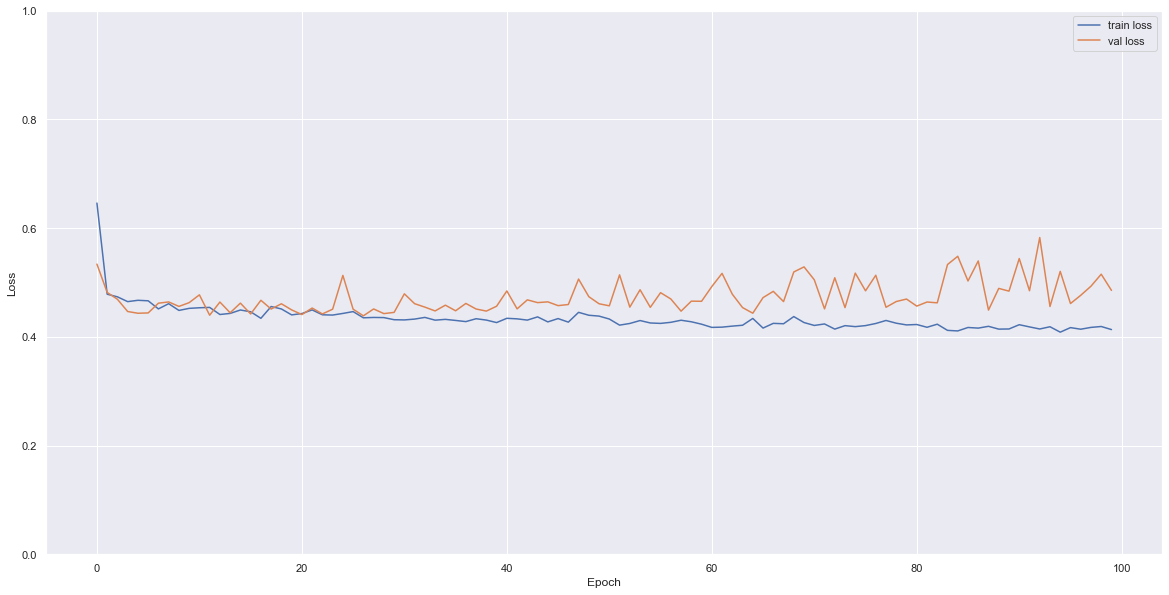

In [157]:
# plot hasil ke grafik
fig, ax = plt.subplots()
ax.plot(history.history['loss'],label='train loss')
ax.plot(history.history['val_loss'],label='val loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim(0,1)
plt.legend()

Mengapa parameter2 tersebut dipilih? untuk optimizer digunakan adamax yang merupakan optimasi dari Adam dan merupakan opsi ketika menggunakan adam belum optimal, sedangkan adamax sendiri berasal dari optimizer adam yang menggabungkan momentum dengan RMSprop. Ketika momentum dan RMSprop telah digunakan namun belum maksimal, maka dapat digunakan adam ataupun adamax. Kemudian untuk iniatlizer digunakan karena berdasarkan percobaan dengan beberapa metode seperti gloroth, he, dan normal. Kemudian untuk aktivasi digunakan relu karena merupakan salah satu metode ketika terjadi masalah gradient problem. Karena ketika tanpa aktivasi ini, hasil yang terbentuk akan datar sehingga dengan penambahan relu mendapatkan hasil akan seperti diatas.

In [53]:
val_accuracy = np.mean(history.history['acc'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 79.03%


Melakukan pemodelan dengan functional API

In [158]:
model_input_funct = tf.keras.Input(shape=X_train_final.shape[1:])

Layer_1 = tf.keras.layers.Dense(128,
                          kernel_regularizer=tf.keras.regularizers.L2(),
                          kernel_initializer='uniform')(model_input_funct)

Layer_1= tf.keras.layers.Activation('relu')((model_input_funct))
Layer_1=tf.keras.layers.Dropout(rate=0.1)(model_input_funct)

Layer_2 = tf.keras.layers.Dense(64,kernel_initializer='uniform')(Layer_1)
Layer_2= tf.keras.layers.Activation('relu')(Layer_1)
Layer_2=tf.keras.layers.Dropout(rate=0.1)(Layer_1)

Layer_3 = tf.keras.layers.Dense(32,kernel_initializer='uniform')(Layer_2)
Layer_3= tf.keras.layers.Activation('relu')(Layer_2)
Layer_3=tf.keras.layers.Dropout(rate=0.1)(Layer_2)

Layer_4 = tf.keras.layers.Dense(16,kernel_initializer='uniform')(Layer_3)
Layer_4= tf.keras.layers.Activation('relu')(Layer_3)
Layer_4=tf.keras.layers.Dropout(rate=0.1)(Layer_3)


model_output = tf.keras.layers.Dense(1, activation='sigmoid')(Layer_3)

model_funct = tf.keras.models.Model(inputs=model_input_funct, outputs=model_output)

In [159]:
model_funct.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.15),
              metrics=['acc'])

In [160]:
history_funct = model_funct.fit(X_train_final, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val_final,y_val),verbose=1)

Epoch 1/100
71/71 [==============================] - 1s 12ms/step - loss: 0.4685 - acc: 0.7773 - val_loss: 0.4567 - val_acc: 0.7711
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4536 - acc: 0.7782 - val_loss: 0.4269 - val_acc: 0.8038
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4526 - acc: 0.7824 - val_loss: 0.4445 - val_acc: 0.7854
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4552 - acc: 0.7742 - val_loss: 0.4609 - val_acc: 0.7584
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4506 - acc: 0.7860 - val_loss: 0.4269 - val_acc: 0.7960
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4483 - acc: 0.7871 - val_loss: 0.4459 - val_acc: 0.7882
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.4438 - acc: 0.7916 - val_loss: 0.4161 - val_acc: 0.8074
Epoch 8/100
71/71 [==============================] - 0s 3ms/step - loss: 0.4491 - 

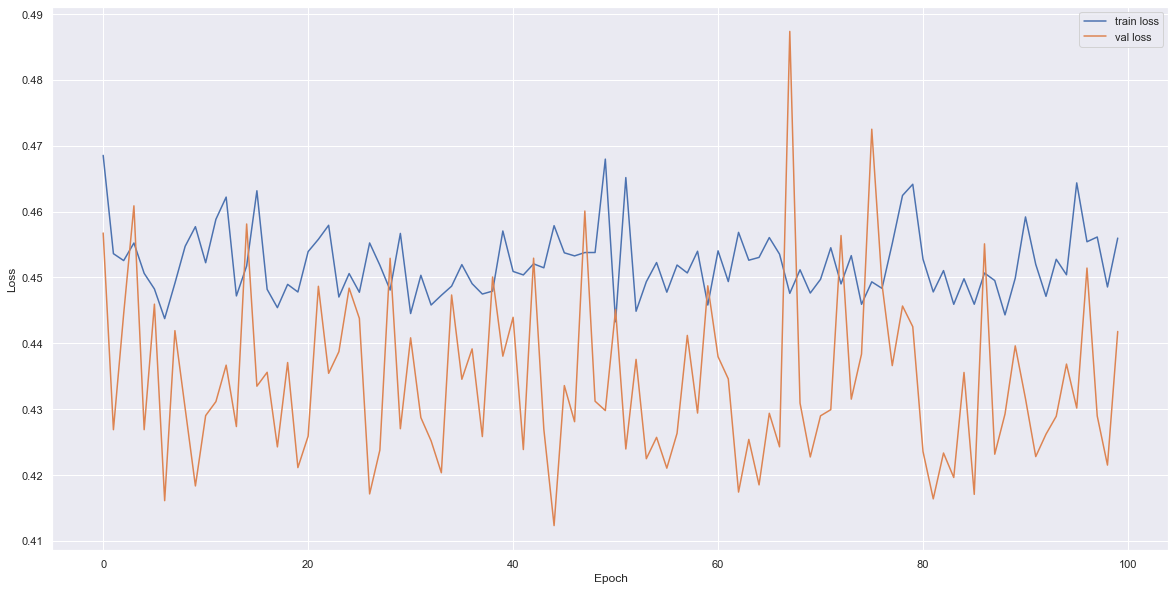

In [161]:
# plot hasil ke grafik
fig2, ax2 = plt.subplots()
ax2.plot(history_funct.history['loss'],label='train loss')
ax2.plot(history_funct.history['val_loss'],label='val loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
plt.legend()

In [162]:
val_accuracy_2 = np.mean(history_funct.history['acc'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy_2*100))


val_accuracy: 78.20%


## MODEL EVALUATE

In [163]:
# accuracy untuk sequential API dan functional API
print("\n%s: %.2f%%" % ('val_accuracy sequential API', val_accuracy*100))
print("\n%s: %.2f%%" % ('val_accuracy functional API', val_accuracy_2*100))


val_accuracy sequential API: 79.03%

val_accuracy functional API: 78.20%


Berdasarkan accuracy kedua model diatas, dengan sequential API, nilai accuracy scorenya lebih tinggi daripada functional API. Berdasarkan grafik yang dihasilkan, kita dapat melihat bahwa pada model sequential mempresentasikan hasil yang baik karena train loss dan val loss garisnya saling berhimpitan yang artinya kedua hasil ini tidak jauh berbeda atau tidak terindikasi adanya overfitting ataupun underfitting. Sebaliknya pada model functional, kita dapat melihat pada grafik bahwa pada train loss nilainya lebih tinggi dan mengindikasikan adanya underfitting pada model tersebut.

### Data prediction

In [76]:
y_pred = model.predict(X_test_final)
y_pred = (y_pred > 0.5)
y_pred

36/36 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [77]:
# konversi data kedalam dataframe

y_pred_df = pd.DataFrame(y_pred, columns = ['Churn Prediction'])

In [99]:
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

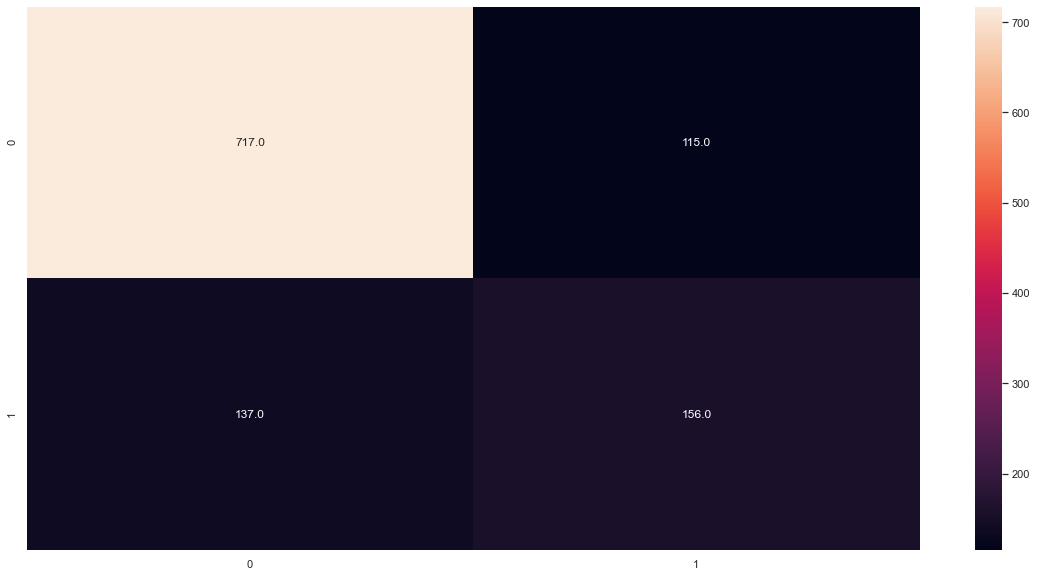

In [103]:
sns.heatmap(cm, annot=True,fmt=".1f")

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       832
           1       0.58      0.53      0.55       293

    accuracy                           0.78      1125
   macro avg       0.71      0.70      0.70      1125
weighted avg       0.77      0.78      0.77      1125



Berdasarkan confusion matrix kita dapat mengetahui bahwa pada test data, terdapat 137 data yang merupakan FN dan 115 data yg FP. Kemudian dari hasil classification report, dapat diketahui bahwa accuracy dari pemodelan ini adalah 0.78. Kemudian Untuk precision dari model untuk 0 adalah 0.84 dan untuk 1 adalah 0.58 yang menandakan ketepatan TP didalam TP + FP. Kemudian untuk recall yang didapat sebesar 0.86 dan 0.53. recall ini menunjukkan seberapa ketepattan TP didalam TP + FN. Pada banyaknya data yg 1 dan 0 dapat dilihat tidak imbalance jumlahnya sehingga hasilnya kurang maksimal. Maka dari itu kemungkinan hasil bisa lebih baik jika data dapat dibalance dahulu

Dari dataset yang digunakan, kondisi yang paling bahaya ialah kasus FN karena saat pelanggan yang terprediksi 0 ingin dibiarkan maka industri akan kehilangan pelanggan yang seharusnya bisa tetap menggunakan layanan industri tersebut. 

## MODEL INFERENCE

In [104]:
# copy data untuk menghindari data hilang
datacopy_2 = datacopy.copy()

In [107]:
# membuat data inference
data_inf =datacopy_2.sample(10, random_state=28)

In [108]:
# reset index
data_inf.reset_index(drop=True, inplace = True)

In [111]:
# cek data
data_inf

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.85,4308.25,0
1,No,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,216.20,0
2,No,No,9,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.60,190.10,0
3,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.30,228.75,0
4,Yes,No,16,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,49.95,810.20,1
5,No,No,38,Yes,Yes,DSL,No,Yes,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),68.15,2656.30,0
6,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),113.40,8164.10,0
7,No,No,24,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.55,1210.40,1
8,No,No,43,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.45,1110.05,0
9,Yes,No,40,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),99.20,4062.20,1


In [120]:
# split data

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [113]:
# feature scaling 
scaler = StandardScaler()

# lakukan fit untuk data
scaler.fit(X_train_num)

# lakukan transform scaling untuk tiap data
data_inf_scaled = scaler.transform(data_inf_num)

In [115]:
# feature encoding

encoder = OneHotEncoder()

# lakukan fit encoding untuk tiap data
encoder.fit(X_train_cat)

# lakukan transform encoding untuk tiap data
data_inf_encoded = encoder.transform(data_inf_cat).toarray()

In [116]:
# concate the data

data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis = 1)

In [123]:
data_inf_final.shape

(10, 42)

In [126]:
# predict data inference

y_pred_inf = model.predict(data_inf_final)
y_pred_inf = (y_pred_inf > 0.5)

1/1 [==============================] - 0s 39ms/step


In [127]:
# konversi data kedalam dataframe

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns = ['Churn Prediction'])


In [128]:
# concat data sebelumnya dengaan data aslinya
pd.concat([data_inf['Churn'],y_pred_inf_df], axis = 1)

,Churn,Churn Prediction
0,0,False
1,0,False
2,0,True
3,0,False
4,1,True
5,0,False
6,0,False
7,1,False
8,0,False
9,1,False


## MAKE PIPELINE

In [168]:
numeric_pipe = Pipeline(steps=[('scaler', StandardScaler())])
categorical_pipe = Pipeline(steps=[('encoder', OneHotEncoder())])

In [189]:
numeric_features = num_columns
categorical_features = cat_columns


preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_pipe, numeric_features),
    ('categorical', categorical_pipe, categorical_features)
]) 

In [191]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
# trial

# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# train_dataset = train_dataset.map(preprocessor)
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)


# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# test_dataset = test_dataset.map(preprocessor)
# test_dataset = test_dataset.shuffle(buffer_size=1024).batch(64)


# model_data = model

# model_data.fit(train_dataset, epochs=50)

In [194]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64).prefetch(AUTOTUNE)


test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(64).prefetch(AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(64).prefetch(AUTOTUNE)

model_data = model

model_data.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
71/71 [==============================] - 1s 8ms/step - loss: 0.3964 - acc: 0.8118 - val_loss: 0.6899 - val_acc: 0.8045
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 0.4019 - acc: 0.8082 - val_loss: 0.6128 - val_acc: 0.8038
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 0.3929 - acc: 0.8031 - val_loss: 0.8073 - val_acc: 0.7982
Epoch 4/50
71/71 [==============================] - 0s 5ms/step - loss: 0.3896 - acc: 0.8051 - val_loss: 0.9392 - val_acc: 0.8045
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 0.4141 - acc: 0.7964 - val_loss: 0.7931 - val_acc: 0.8067
Epoch 6/50
71/71 [==============================] - 0s 4ms/step - loss: 0.3958 - acc: 0.8044 - val_loss: 0.8409 - val_acc: 0.7996
Epoch 7/50
71/71 [==============================] - 0s 5ms/step - loss: 0.3980 - acc: 0.8080 - val_loss: 0.6224 - val_acc: 0.8003
Epoch 8/50
71/71 [==============================] - 0s 4ms/step - loss: 0.3970 - acc: 0.80

In [195]:
# Cek jumlah batch

print('Number of Batch - Train : ', tf.data.experimental.cardinality(train_dataset).numpy())
print('Number of Batch - Test  : ', tf.data.experimental.cardinality(test_dataset).numpy())

Number of Batch - Train :  71
Number of Batch - Test  :  18


## KESIMPULAN

Berdasarkan hasil EDA kita dapat mengetahui bahwa banyak customer pada tenor awal yang memutuskan untuk tidaak menggunakan layanan ini lagi karena mungkin layanan ini kurang menarik. kemudian masih banyak pelanggan yang tidak memanfaatkan layanan yang ada. Kemungkinan banyak pelanggan kebanyakan hanya memanfaatkan layanan telpon saaja sehingga mereka tidak butuh layanan lainnya seperti streaming, protection, dan lainnya. Hal ini bisa kita lihat bahwa pengguna layanan telpon sangat banyak dan mendominasi jumlahnya sedangkan pelanggan yang tidak memanfaatkan layanan telfon ini kemungkinan hanya membutuhkan layanan diluar telfon seperti streaming dan internet. 
    gender  yang menjadi partner maupun tidak hampir sama namun pelanggan wanita lebih tinggi nilainya walaupun tidak jauh berbeda nilainya sehingga gender ini tidak bisa dikatakan berpengaruh terhadap pelanggan partner.Kemudian untuk dependents nilainya hampir sama antara wanita dan pria sehingga gender ini juga tidak bisa dikatakan menjadi pengaruh terhadap dependents.
    Kita dapat melihat bahwa pengguna fiber optic ini jauh lebih tinggi daripada DSL. Beberapa pelanggan juga ada yang tidak mengaktifkan layanan internet. Sehingga kita perlu meningkatkan layanan internet agar customer bertahan. Jumlah pelanggan yang ada jumlahnya lebih banyak daripada yang pindah. Kita tau juga bahwa besarnya tagihan bulanan tidak terlalu ada hubungannya dengan pelanggan tetap.
    Dapat diketahui bahwa pembayaran dengan electroniccheck memiliki nominal yang jauh lebih besar daripada metode pembayaran lainnya sehingga metode ini perlu ditingkatkan.

Berdasarkan hasil pemodelan yang telah dibuat, didapatkan yang cukup karena accuracy diatas 70% namun belum bisa sangat baik karena tidak mencapai 90%. Improvement yang dihasilkan ialah dengan mengganti optimizer ke adamax, kemudian dengan initializer uniform dan activation relu serta didukung oleh gradient clipping
    Dari hasil pemodelan dan hasil confusion matrix diketahui bahwa model ini memprediksi FN sebanyak 115 dan FP 137. Jika dilihat berdasarkan classification report, untuk recall dan precision terbaik adalah pada data dengan target 0 dikarenakan efek data yang imbalance. Recall terbaik yang diperoleh ialah 0.86 dan untuk precision yang didapat ialah 0.84 serta accuracy model yang diperloeh berdaaasarkan classification report adalah 0.78. Model ini bisa ditingkatkan agar prediksi pelanggan yang diprediksi terus menggunakan layanan tidak salah sehingga dalam menentukan prioritas pelanggan bisa lebih tepat dan tidak terjadi kesalahan karena pelanggan yang aslinya menetap namun terprediksi meninggalkan layanan ini.